In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# CSV - modified to rename columns
data = pd.read_csv('resources/data_modified.csv')

# Remove un-needed columns
data = data.drop(columns=['win','me','2','3','4','5','6','7','8','9','10','11','12',\
                          'production','tradeGain','robberCardsGain','totalGain','tradeLoss',\
                          'robberCardsLoss','tribute','totalLoss','totalAvailable'])

# Pandas dummies convert to categorical
data = pd.get_dummies(data)

# Create list of column names
columns = []
for ea in data.columns:
    columns.append(ea)
# Pop 0th
columns.pop(0)

'gameNum'

In [6]:
data

,gameNum,player,points,1_1_N,1_1_P,1_2_N,1_2_P,1_3_N,1_3_P,2_1_N,...,2_3_R_2S,2_3_R_2W,2_3_R_3G,2_3_R_B,2_3_R_C,2_3_R_D,2_3_R_L,2_3_R_O,2_3_R_S,2_3_R_W
0,1,1,5,6,5,3,2,11,2,9,...,0,0,0,0,0,0,0,1,0,0
1,1,2,9,5,4,8,5,10,3,4,...,0,0,0,0,0,0,0,1,0,0
2,1,3,10,5,4,6,5,12,1,8,...,0,0,0,0,1,0,0,0,0,0
3,1,4,5,6,5,9,4,3,2,4,...,0,0,0,0,0,0,0,0,1,0
4,2,1,10,6,5,9,4,10,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,8,5,4,3,3,2,4,...,0,0,0,0,0,0,0,0,1,0
196,50,1,5,6,5,9,4,10,3,5,...,0,0,0,0,1,0,0,0,0,0
197,50,2,10,8,5,4,3,3,2,4,...,0,0,0,0,1,0,0,0,0,0
198,50,3,4,5,4,8,5,10,3,5,...,0,0,0,0,0,0,0,0,1,0


In [27]:
#'resources/data_modified.csv'
import csv

rows = []
with open('resources/data_modified.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    row = next(reader, None)
    while row is not None:
        
        gameNum = row.pop('gameNum')
        player = row.pop('player')
        new_k1 = {f'player_{player}_{k}': row[k] for k in row}
        row = next(reader, None)
        row.pop('gameNum')
        player = row.pop('player')
        new_k2 = {f'player_{player}_{k}': row[k] for k in row}
        row = next(reader, None)
        row.pop('gameNum')
        player = row.pop('player')
        new_k3 = {f'player_{player}_{k}': row[k] for k in row}
        row = next(reader, None)
        row.pop('gameNum')
        player = row.pop('player')
        new_k4 = {f'player_{player}_{k}': row[k] for k in row}
        
       
        final = {'gameNum':gameNum,**new_k1,**new_k2,**new_k3,**new_k4}
        rows.append(final)
        row = next(reader, None)
        
        p1 = 56
        p2 = 65
        p3 = 88
        p4 = 'blah'
        p = [56, 65, 88, 'blah']
        q = {'p1':56, 'p2':65, 'p3':88, 'p4':'blah'}
        
        myfunc(*p)
        myfunc(56, 65, 88, 'blah')
        myfunc(48, 55, **q)
        myfunc(48, 55, 'p1'=56, 'p2'=65, 'p3'=88, 'p4'='blah')
#         break
print(len(rows))
        
#     for row in reader:
#         gameNum = row.pop('gameNum')
#         player = row.pop('player')
#         new_k = {f'player_{player}_{k}': row[k] for k in row}
#         print(new_k)
#         break

50


In [29]:
blah = pd.DataFrame(rows)

In [31]:
blah.head()

,gameNum,player_1_points,player_1_win,player_1_me,player_1_2,player_1_3,player_1_4,player_1_5,player_1_6,player_1_7,...,player_4_2_3_R,player_4_production,player_4_tradeGain,player_4_robberCardsGain,player_4_totalGain,player_4_tradeLoss,player_4_robberCardsLoss,player_4_tribute,player_4_totalLoss,player_4_totalAvailable
0,1,5,0,,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
1,2,10,1,,1,6,3,9,10,8,...,S,61,16,11,88,25,6,4,35,53
2,3,5,0,,0,3,3,10,10,4,...,L,53,2,2,57,4,4,8,16,41
3,4,7,0,,1,6,5,12,14,20,...,O,75,11,8,94,37,19,0,56,38
4,5,8,0,1,1,3,7,9,12,14,...,C,48,4,5,57,6,10,9,25,32


In [19]:
data.to_csv('shaped.csv')

PermissionError: [Errno 13] Permission denied: 'shaped.csv'

In [32]:
# Assign X (data) and y (target)
X = data[columns]
y = data['points'].values.reshape(-1,1)
print(X.shape, y.shape)

(200, 50) (200, 1)


In [33]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [34]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [35]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [36]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

In [37]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

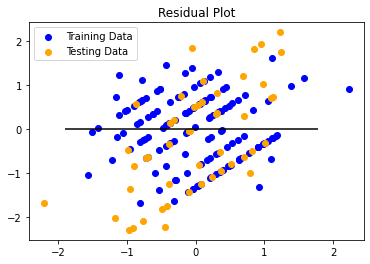

In [38]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [39]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.4623353604958107, R2: -0.7019224290256809


In [41]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3314216246547355, R2: -0.5495599618964404


In [42]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3314216246547355, R2: -0.5495599618964404


In [43]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3840887188074433, R2: -0.610855962274705


In [35]:
########################
# GridSearch Estimator #
########################

In [36]:
data

,win,1_1_N,1_2_N,1_3_N,2_1_N,2_2_N,2_3_N,1_1_R_C,1_1_R_L,1_1_R_O,...,2_3_R_2S,2_3_R_2W,2_3_R_3G,2_3_R_B,2_3_R_C,2_3_R_D,2_3_R_L,2_3_R_O,2_3_R_S,2_3_R_W
0,0,6,3,11,9,10,11,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5,8,10,4,5,11,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,5,6,12,8,4,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,6,9,3,4,8,10,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,6,9,10,8,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,8,4,3,4,5,11,0,0,0,...,0,0,0,0,0,0,0,0,1,0
196,0,6,9,10,5,6,11,0,0,1,...,0,0,0,0,1,0,0,0,0,0
197,1,8,4,3,4,9,11,0,1,0,...,0,0,0,0,1,0,0,0,0,0
198,0,5,8,10,5,9,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data[]